# Figures for Dussin, *in prep* 

## **Four generations of ECMWF reanalyses: an overview of the successes in modeling precipitation and remaining challenges for freshwater budget of ocean models.**

## 1. Freshwater balance in the ocean (Figure 11)

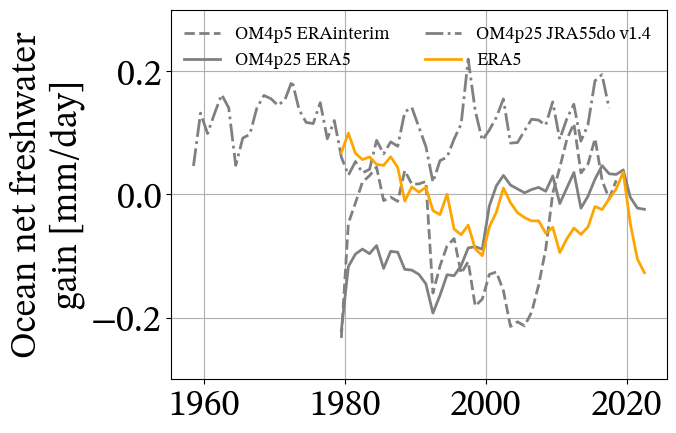

In [1]:
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

use_stix = True

if use_stix:
    # replace with your own copy
    dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
    import matplotlib.font_manager as font_manager
    for font in font_manager.findSystemFonts(dirstix):
        font_manager.fontManager.addfont(font)
    # Set font family globally
    plt.rcParams['font.family'] = 'STIX Two Text'

# load data
wfo_om4jra55 = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_om4_jra55.nc")["wfo_om4jra55"]
wfo_om4erai = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_om4_erai.nc")["wfo_om4erai"]
wfo_om4era5 = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_om4_era5.nc")["wfo_om4era5"]
wfo_era5 = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_era5.nc")["wfo_era5"]

# plot
plt.rcParams.update({"font.size": 26})
ax = plt.axes()

wfo_om4erai.plot(ax=ax, label="OM4p5 ERAinterim", color="grey", linestyle="--", linewidth=2)
wfo_om4era5.plot(ax=ax, label="OM4p25 ERA5", color="grey", linestyle="-", linewidth=2)
wfo_om4jra55.plot(ax=ax, label="OM4p25 JRA55do v1.4", color="grey", linestyle="-.", linewidth=2)
wfo_era5.plot(ax=ax, label="ERA5", color="orange", linewidth=2)

plt.ylabel("Ocean net freshwater\ngain [mm/day]")
plt.xlabel("")
plt.ylim([-0.3, 0.3])
plt.grid()
plt.legend(fontsize=13, ncols=2, frameon=False)
plt.draw()
#plt.savefig("net_freshwater.png", bbox_inches="tight")

## 2. Evaporation in OM4 experiments compared to Flux products (Figure 12)

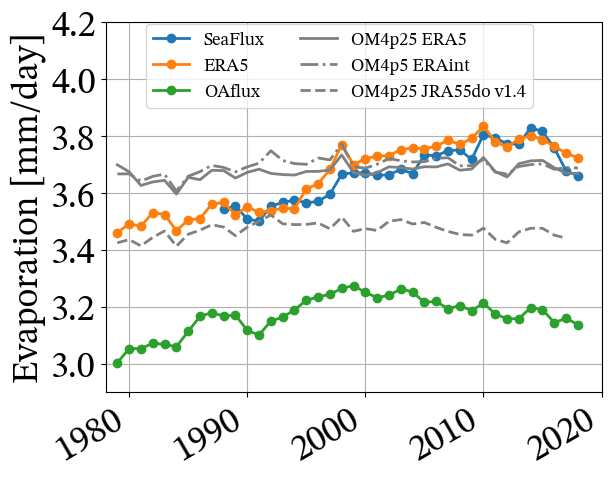

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

use_stix = True

if use_stix:
    # replace with your own copy
    dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
    import matplotlib.font_manager as font_manager
    for font in font_manager.findSystemFonts(dirstix):
        font_manager.fontManager.addfont(font)
    # Set font family globally
    plt.rcParams['font.family'] = 'STIX Two Text'

# load data
evap_plt = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_evap_compare_grd_oaflux_1deg+era+jra.nc")

# plot
plt.rcParams.update({"font.size": 26})
plt.figure()
ax = plt.axes()
kwargs=dict(yincrease=True, linewidth=2)

pltime = evap_plt["time"] - np.timedelta64(364, 'D')
evap_plt["time"] = pltime

evap_plt["seaflux"].plot(ax=ax, label="SeaFlux", marker="o", **kwargs)
evap_plt["era5"].plot(ax=ax, label="ERA5", marker="o", **kwargs)
evap_plt["oaflux"].plot(ax=ax, label="OAflux", marker="o", **kwargs)
evap_plt["om4_adjustrest"].plot(ax=ax, label="OM4p25 ERA5",color="grey", linestyle="-", **kwargs)
evap_plt["erai_adjusted"].plot(ax=ax, label="OM4p5 ERAint", color="grey", linestyle="-.", **kwargs)
evap_plt["jra_c6"].plot(ax=ax, label="OM4p25 JRA55do v1.4", color="grey", linestyle="--", **kwargs)

plt.xticks([np.datetime64("1980-01-01"),
            np.datetime64("1990-01-01"),
            np.datetime64("2000-01-01"),
            np.datetime64("2010-01-01"),
            np.datetime64("2020-01-01"),], 
           ["1980", "1990", "2000", "2010", "2020"])
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0,4.2])

plt.xlabel("")
plt.ylabel("Evaporation [mm/day]")
plt.legend(fontsize=13, ncols=2, bbox_to_anchor=[0.88,1.02], frameon=True)
plt.grid()
plt.xlim([np.datetime64("1978-01-01"), np.datetime64("2020-01-01")])
plt.ylim([2.9, 4.2])
plt.draw()
#plt.savefig("evaporation_comparation.png", bbox_inches="tight")